In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV1/'
TrainModelName = 'S54bin2V1.npz'
ValidationModelName = 'S54bin2V1Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'OSnetbin2d38V1f48.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 38
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = False
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='OSnetbin2d38V1f48.h5', batch_size=100, box_vector=5, categories=4, depth=38, epochs=250, gridX=1, gridY=1, learning_rate=1e-06, mid_kernel=3, multievent=False, nboxes=5, residual=False, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
(36076, 1, 1, 9)
loading weights
(36076, 1, 1, 29) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 27s 737us/step - loss: 0.5902 - acc: 0.7870 - val_loss: 0.6400 - val_acc: 0.7699

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6399764757271877, 'val_acc': 0.7698788865733737, 'loss': 0.5901897187302496, 'acc': 0.7870329272153571, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

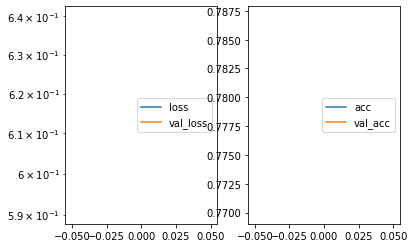

Predicted cell: MatureP1 Probability: [[0.9639358]]
True Cell type: MatureP1
X [[0.46907905]]
True positional value X 0.5
Y [[0.48528776]]
True positional value Y 0.3148148148148148
H [[0.41109562]]
True positional value H 0.2777777777777778
W [[0.4787527]]
True positional value W 0.2222222222222222
C [[0.59296924]]
True positional value C 1.0


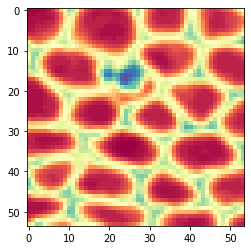

Epoch 2/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.5872 - acc: 0.7804 - val_loss: 0.6369 - val_acc: 0.7630

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6368642672857151, 'val_acc': 0.763033175418225, 'loss': 0.5872058907234824, 'acc': 0.7804357434458447, 'lr': 1e-06}


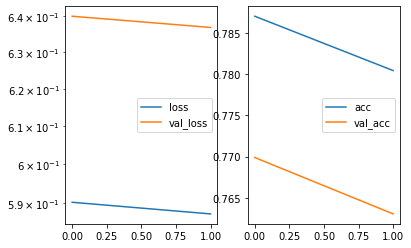

Predicted cell: MacroCheate Probability: [[0.90773296]]
True Cell type: MacroCheate
X [[0.4922691]]
True positional value X 0.3148148148148148
Y [[0.4226992]]
True positional value Y 0.3148148148148148
H [[0.43613344]]
True positional value H 0.5555555555555556
W [[0.35534737]]
True positional value W 0.5
C [[0.53456783]]
True positional value C 1.0


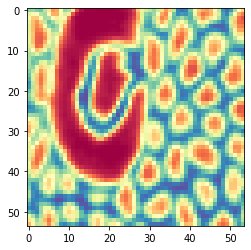

Epoch 3/250
23400/36076 [==================>...........] - ETA: 7s - loss: 0.5870 - acc: 0.7741

In [ ]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
